In [1]:
from timing_games_package import Simulation
from timing_games_package.Configuration import sim_config_init
import matplotlib.pyplot as plt
# import matplotlib.animation as animation
from matplotlib import style
import numpy as np
import pandas as pd
plt.style.use('default')

# config parameters


`game_type`: game type. It could be 'fear', 'greed', or 'other'.


`sampling`: number of players to sample. Give each player an array of random other players to sample, default to None.
- `sampling=None` means players could observe all other players' moves.
- `sampling=5` means players could only observe 5 other players' moves.

`purification`


`trembling`: trembling range (set to 0 to have no effect)


`theta`: moving chance is [theta, theta+0.05].
- `theta=None` means moving chance is 100%
- `theta=0.05` means moving chance is 5%-10%

`bandwidth`: smoothing bandwidth (set None to disable). It could be 0.1, 0.2, etc

`asynchronous`: game synchronicity
- `asynchronous=True` means players see moves as they happen
- `asynchronous=False` means all players decide their moves based on the previous tick


`lgr`: lambda/gamma/rho params: (lambda, gamma, rho)
- `lgr=(10,1.1,0.5)` means (lambda, gamma, rho)=(10, 1.1, 0.5)

`num_bots`: number of bots

`game_length`: game length. Simulation periods

`x_bound`: the range or lanscape of timing x


In [19]:
history = {}
round_idx = 0

# Set up simulation configuration
sim_config = sim_config_init(
    game_type='fear', 
    sampling=None, 
    purification=None, 
    trembling=0., 
    theta=0.05, 
    bandwidth=None,
    asynchronous=False, 
    lgr=(10,1.1,0.5),
    game_length=20,
    x_bound=(0,13)
)

# Simulate players' initial strategies and payoffs
strategies, sample_sets = Simulation.initialize_player_strategies(sim_config)
x, y, strat_x, strat_y, strategies_y, quantile = Simulation.calculate_payoff(sim_config, strategies, sample_sets)

# Log data for the initial round
# history = data_logging(['strategies', 'x', 'y', 'strat_x', 'strat_y'], round_idx, history) # To Do
history['strategies', round_idx] = strategies.copy()
history['x', round_idx] = x
history['y', round_idx] = y
history['strat_x', round_idx] = strat_x
history['strat_y', round_idx] = strat_y
history['strategies_y', round_idx] = strategies_y
history['quantile', round_idx] = quantile

# Iterate simulation to update players' strategies and payoff
max_game_length = sim_config['game_length']
print('----------------Simulation Start----------------')
print('Period 0 done')
while round_idx < max_game_length:
    round_idx += 1
    strategies = Simulation.update_player_strategies(x, y, strategies, sample_sets, sim_config)
    x, y, strat_x, strat_y, strategies_y, quantile = Simulation.calculate_payoff(sim_config, strategies, sample_sets)

    # Log data for the round
    history['strategies', round_idx] = strategies.copy()
    history['x', round_idx] = x
    history['y', round_idx] = y
    history['strat_x', round_idx] = strat_x
    history['strat_y', round_idx] = strat_y
    history['strategies_y', round_idx] = strategies_y
    history['quantile', round_idx] = quantile
    print('Period {} done'.format(round_idx))
    
print('----------------Simulation Finished----------------')
    

----------------Simulation Start----------------
Period 0 done
Period 1 done
Period 2 done
Period 3 done
Period 4 done
Period 5 done
Period 6 done
Period 7 done
Period 8 done
Period 9 done
Period 10 done
Period 11 done
Period 12 done
Period 13 done
Period 14 done
Period 15 done
Period 16 done
Period 17 done
Period 18 done
Period 19 done
Period 20 done
----------------Simulation Finished----------------


<IPython.core.display.Javascript object>


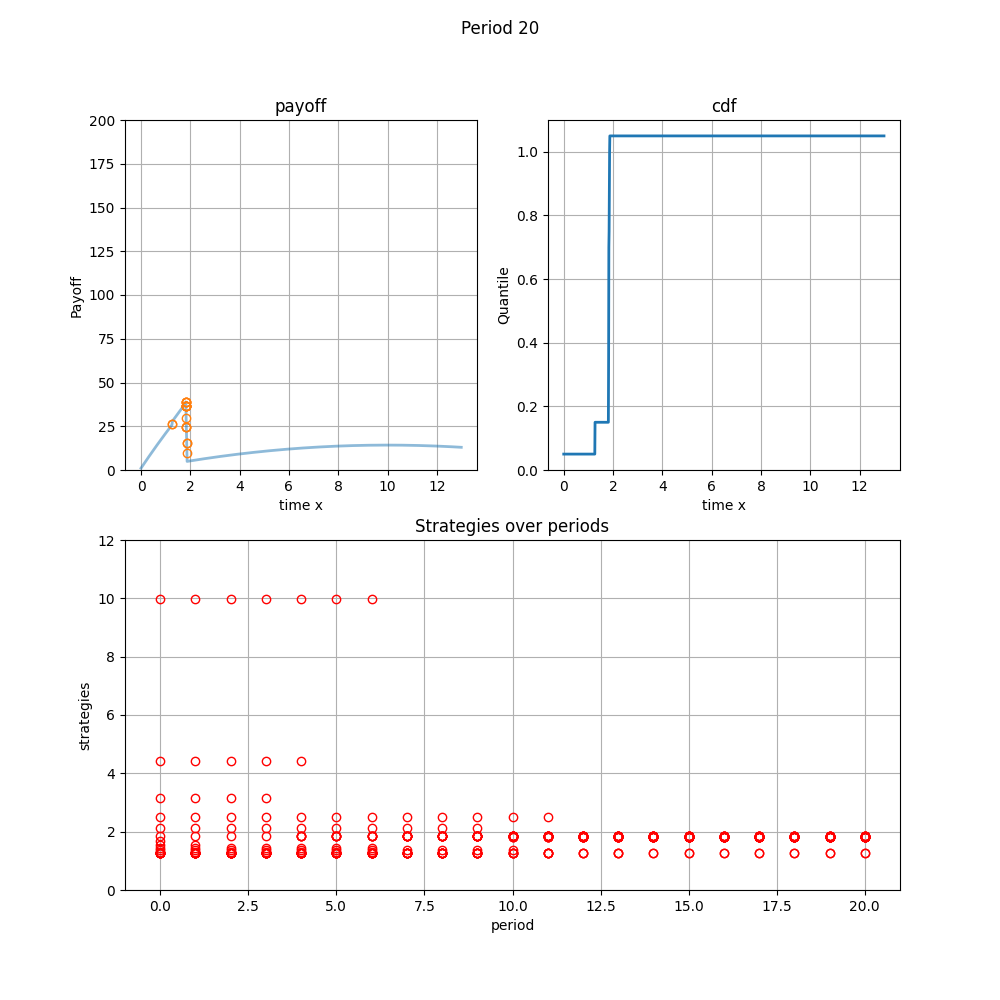

Done


In [20]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(10,10))
gs = fig.add_gridspec(2, 2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])
plt.ion()

fig.show()
fig.canvas.draw()

for i in range(round_idx+1):
    ax1.clear()
    ax1.plot(history['x', i], history['y', i], alpha=0.5, linewidth = '2')
    ax1.plot(history['strat_x', i], history['strat_y', i], 'o', fillstyle='none')
    ax1.set_ylim([0, 200])
    ax1.set_xlabel('time x')
    ax1.set_ylabel('Payoff')
    ax1.set_title('payoff')
    ax1.grid()
    
    ax2.clear()
    ax2.plot(history['x', i], history['quantile', i], linewidth = '2')
    ax2.set_xlabel('time x')
    ax2.set_ylabel('Quantile')
    ax2.set_title('cdf')
    ax2.grid()
    
    plot_round = np.array([i]*len(history['strategies', 0]))
    ax3.plot(plot_round, history['strategies', i], 'ro', fillstyle='none')
    ax3.set_xlim([-1, round_idx+1])
    ax3.set_ylim([0, 12])
    ax3.set_xlabel('period')
    ax3.set_ylabel('strategies')
    ax3.set_title('Strategies over periods')
    ax3.grid()
    
    plt.pause(1)
    fig.suptitle('Period ' + str(i))
    fig.canvas.draw()
print('Done')

In [59]:
round_idx

10